In [10]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/gunde/OneDrive/Desktop/project/Dataset/Allergen_Status_of_Food_Products (2).csv'
data = pd.read_csv(file_path)

# Display the first few rows and general info of the data to understand its structure
data_info = data.info()
data_head = data.head()

data_info, data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   119 non-null    object 
 3   Fat/Oil                     341 non-null    object 
 4   Seasoning                   379 non-null    object 
 5   Allergens                   251 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


(None,
           Food Product Main Ingredient Sweetener Fat/Oil Seasoning  \
 0       Almond Cookies         Almonds     Sugar  Butter     Flour   
 1       Almond Cookies         Almonds     Sugar  Butter     Flour   
 2  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
 3  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
 4       Cheddar Cheese          Cheese       NaN     NaN      Salt   
 
                 Allergens  Price ($)  Customer rating (Out of 5) Prediction  
 0   Almonds, Wheat, Dairy      10.15                         3.1   Contains  
 1   Almonds, Wheat, Dairy       6.17                         4.5   Contains  
 2  Chicken, Wheat, Celery      19.65                         4.1   Contains  
 3  Chicken, Wheat, Celery      17.48                         4.7   Contains  
 4                   Dairy      10.83                         3.7   Contains  )

In [12]:
# Step 1: Handle missing values by dropping or imputing (we'll use imputation for "Prediction")
# Check how many missing values are in each column
missing_values = data.isnull().sum()

# Impute the missing value in 'Prediction' with the most frequent value
data['Prediction'].fillna(data['Prediction'].mode()[0], inplace=True)

# Step 2: Check for duplicates in the dataset
duplicates = data.duplicated().sum()

# Step 3: Check for outliers in numerical columns using IQR method
# Outliers will be detected but not removed
numeric_columns = ['Price ($)', 'Customer rating (Out of 5)']
outliers_info = {}
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outliers_info[column] = outliers

# Step 4: Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# Label Encoding for the Prediction column
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])

# One-hot encoding for categorical feature columns
encoded_data = pd.get_dummies(data, columns=['Food Product', 'Main Ingredient', 'Sweetener', 
                                             'Fat/Oil', 'Seasoning', 'Allergens'])

# Output results to verify each step
missing_values, duplicates, outliers_info, encoded_data.head()


C:\Users\gunde\AppData\Local\Temp\ipykernel_18932\1129615876.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prediction'].fillna(data['Prediction'].mode()[0], inplace=True)


(Food Product                    0
 Main Ingredient                 0
 Sweetener                     280
 Fat/Oil                        58
 Seasoning                      20
 Allergens                     148
 Price ($)                       0
 Customer rating (Out of 5)      0
 Prediction                      1
 dtype: int64,
 0,
 {'Price ($)': 0, 'Customer rating (Out of 5)': 0},
    Price ($)  Customer rating (Out of 5)  Prediction  \
 0      10.15                         3.1           0   
 1       6.17                         4.5           0   
 2      19.65                         4.1           0   
 3      17.48                         4.7           0   
 4      10.83                         3.7           0   
 
    Food Product_Almond Cookies  Food Product_Aloo Gobi  \
 0                         True                   False   
 1                         True                   False   
 2                        False                   False   
 3                        False   

In [14]:
# Code to check for duplicates without removing any rows
# Code to check for duplicates without removing any rows
duplicates_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)


Number of duplicate rows: 0


In [16]:
# List of numerical columns to check for outliers
numeric_columns = ['Price ($)', 'Customer rating (Out of 5)']

# Dictionary to store outlier counts for each column
outliers_info = {}

# IQR method to check for outliers
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count of outliers in each column
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outliers_info[column] = outliers

print("Outliers information:", outliers_info)


Outliers information: {'Price ($)': 0, 'Customer rating (Out of 5)': 0}


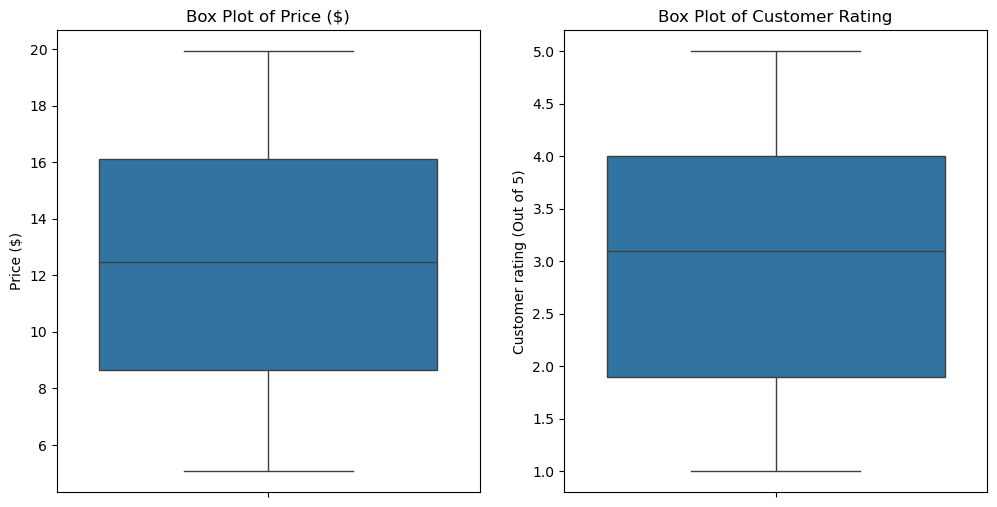

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot canvas for side-by-side boxplots
plt.figure(figsize=(12, 6))

# Plot the box plot for "Price ($)"
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Price ($)'])
plt.title('Box Plot of Price ($)')

# Plot the box plot for "Customer rating (Out of 5)"
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Customer rating (Out of 5)'])
plt.title('Box Plot of Customer Rating')

# Show the plots
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode the 'Prediction' column
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])

# Display the first few rows in a tabular format
print(data.head().to_string(index=False))


       Food Product Main Ingredient Sweetener Fat/Oil Seasoning              Allergens  Price ($)  Customer rating (Out of 5)  Prediction
     Almond Cookies         Almonds     Sugar  Butter     Flour  Almonds, Wheat, Dairy      10.15                         3.1           0
     Almond Cookies         Almonds     Sugar  Butter     Flour  Almonds, Wheat, Dairy       6.17                         4.5           0
Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt Chicken, Wheat, Celery      19.65                         4.1           0
Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt Chicken, Wheat, Celery      17.48                         4.7           0
     Cheddar Cheese          Cheese       NaN     NaN      Salt                  Dairy      10.83                         3.7           0


In [22]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode the 'Prediction' column
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])

# Step 2: Frequency encoding for specified columns and appending "_Freq" to encoded columns
categorical_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

for column in categorical_columns:
    freq_encoding = data[column].value_counts(normalize=True)
    data[column + '_Freq'] = data[column].map(freq_encoding)

# Display the first few rows in a beautiful HTML table (only for Jupyter)
from IPython.display import display
display(data.head())


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction,Food Product_Freq,Main Ingredient_Freq,Sweetener_Freq,Fat/Oil_Freq,Seasoning_Freq,Allergens_Freq
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,0,0.005013,0.005013,0.773109,0.249267,0.029024,0.007968
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,0,0.005013,0.005013,0.773109,0.249267,0.029024,0.007968
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,0,0.010025,0.005013,NaN,NaN,0.029024,0.007968
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,0,0.010025,0.005013,NaN,NaN,0.029024,0.007968
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,0,0.002506,0.007519,NaN,NaN,0.029024,0.330677


In [1]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('C:/Users/gunde/OneDrive/Desktop/food allergens dataset.csv')

# Step 1: Remove duplicates
data_cleaned = data.drop_duplicates()

# Step 2: Handle missing values in the 'Prediction' column using .loc to avoid warnings
data_cleaned.loc[:, 'Prediction'] = data_cleaned['Prediction'].fillna('Unknown')

# Step 3: Categorize Allergens - split allergens column by commas and create binary columns for each unique allergen
allergen_columns = data_cleaned['Allergens'].str.get_dummies(sep=', ')

# Step 4: Concatenate the allergen binary columns to the original cleaned data
data_preprocessed = pd.concat([data_cleaned, allergen_columns], axis=1)

# Save the cleaned and preprocessed dataset to a new CSV file
data_preprocessed.to_csv('food_allergens_cleaned_dataset.csv', index=False)


print(data_cleaned)




            Food Product Main Ingredient Sweetener        Fat/Oil  \
0         Almond Cookies         Almonds     Sugar         Butter   
2    Chicken Noodle Soup   Chicken broth       NaN            NaN   
4         Cheddar Cheese          Cheese       NaN            NaN   
5         Ranch Dressing      Buttermilk     Sugar  Vegetable oil   
6        Caramel Popcorn         Popcorn     Sugar         Butter   
..                   ...             ...       ...            ...   
393           Lemon Bars     Lemon juice     Sugar         Butter   
395            Pecan Pie          Pecans     Sugar         Butter   
396       Zucchini Bread        Zucchini     Sugar         Butter   
397         Banana Bread         Bananas     Sugar         Butter   
398       Hawaiian Pizza     Pizza dough       NaN            NaN   

          Seasoning               Allergens Prediction  
0             Flour   Almonds, Wheat, Dairy   Contains  
2              Salt  Chicken, Wheat, Celery   Contains  


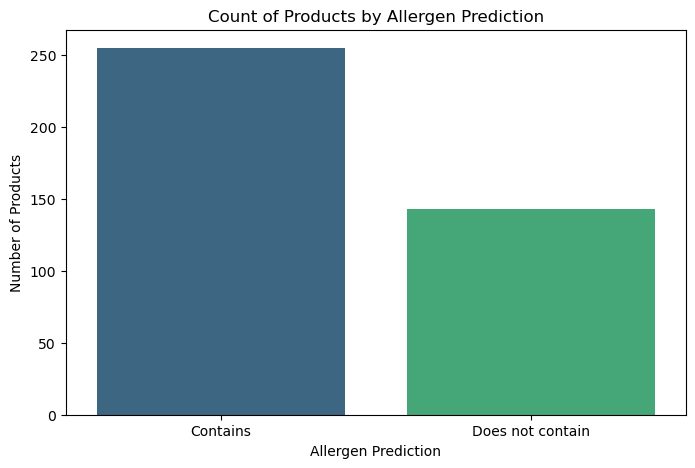

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of products by allergen prediction
allergen_counts = data['Prediction'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=allergen_counts.index, y=allergen_counts.values, hue=allergen_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Count of Products by Allergen Prediction')
plt.xlabel('Allergen Prediction')
plt.ylabel('Number of Products')
plt.show()



In [8]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/gunde/OneDrive/Desktop/project/Dataset/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Define features and target variable
X = data.drop(columns=['Prediction'])
Y = data['Prediction']

# Display the first few rows of X and Y in a tabular format
from IPython.display import display

print("Features (X):")
display(X.head())

print("\nTarget Variable (Y):")
display(Y.head().to_frame())


Features (X):


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy"
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy"
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery"
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery"
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy



Target Variable (Y):


,Prediction
0,Contains
1,Contains
2,Contains
3,Contains
4,Contains


In [10]:
# Print the shape of both X and Y
print("Shape of Features (X):", X.shape)
print("Shape of Target (Y):", Y.shape)


Shape of Features (X): (399, 6)
Shape of Target (Y): (399,)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits to confirm
print("Training set (X_train):", X_train.shape)
print("Testing set (X_test):", X_test.shape)
print("Training target (Y_train):", Y_train.shape)
print("Testing target (Y_test):", Y_test.shape)

Training set (X_train): (319, 6)
Testing set (X_test): (80, 6)
Training target (Y_train): (319,)
Testing target (Y_test): (80,)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('C:/Users/gunde/OneDrive/Desktop/project/Dataset/food_ingredients_and_allergens(final).csv')  # Replace with your actual file path

# Define features (X) and target (y)
X = data.drop(columns='Prediction')
y = data['Prediction']

# Perform a 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (279, 6)
Shape of X_test: (120, 6)
Shape of y_train: (279,)
Shape of y_test: (120,)
